<a href="https://colab.research.google.com/github/zahra-ynp/MLOperation-FinalProject/blob/main/MLOperatin_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Exploration and Validation

1.1: Load and Inspect the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# Load the dataset
file_path = "HR.csv"
data = pd.read_csv(file_path)

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Describe:")
print(data.describe())

print("\nUnique Values per Column:")
print(data.nunique())



First 5 Rows of the Dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  mediu

In [2]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


1.2 Handle Missing Values


In [3]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


1.3: Analyze and Visualize Features


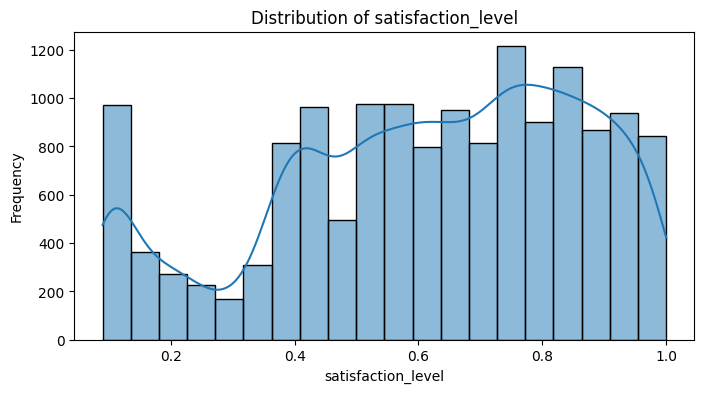

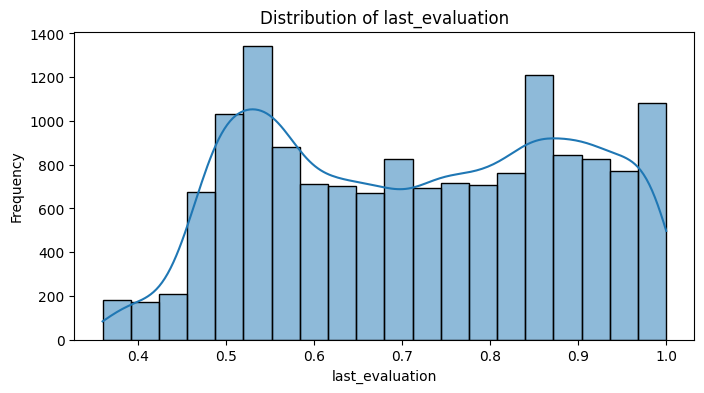

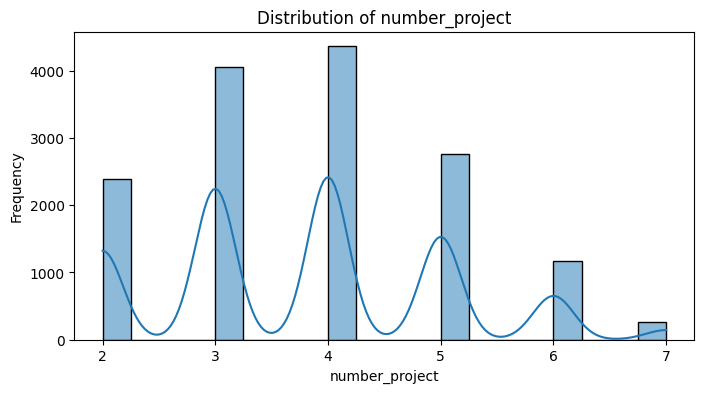

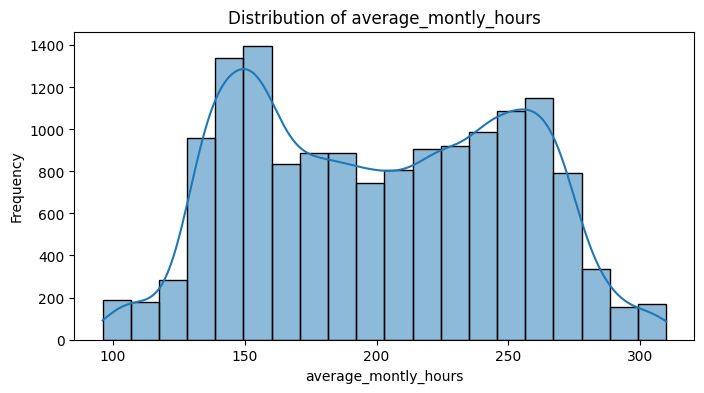

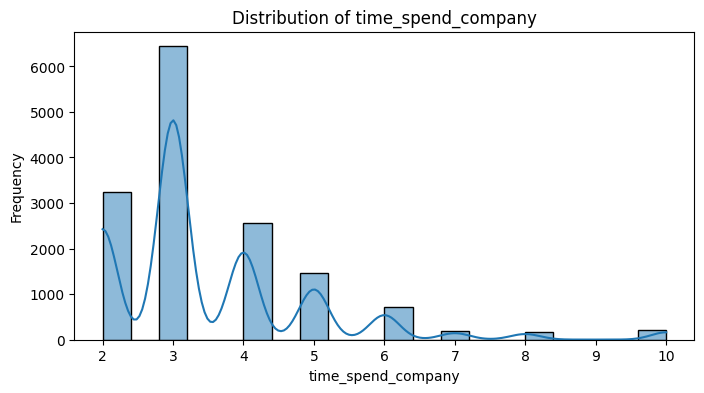

In [4]:
# Numerical features
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


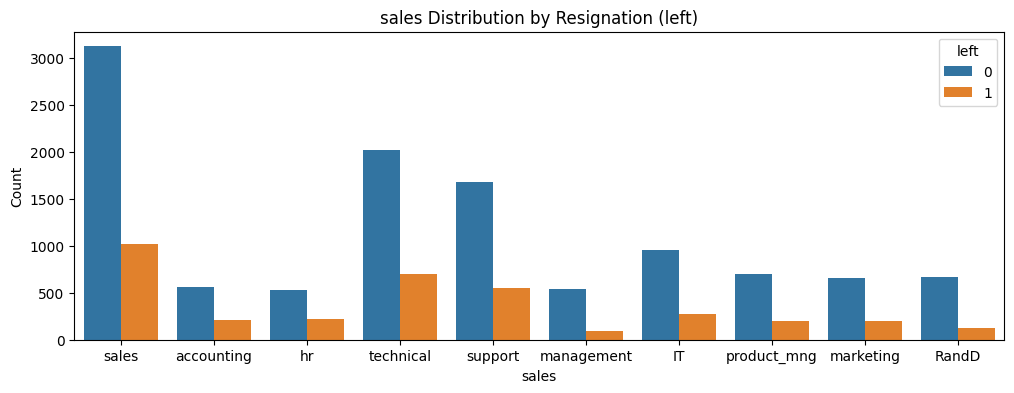

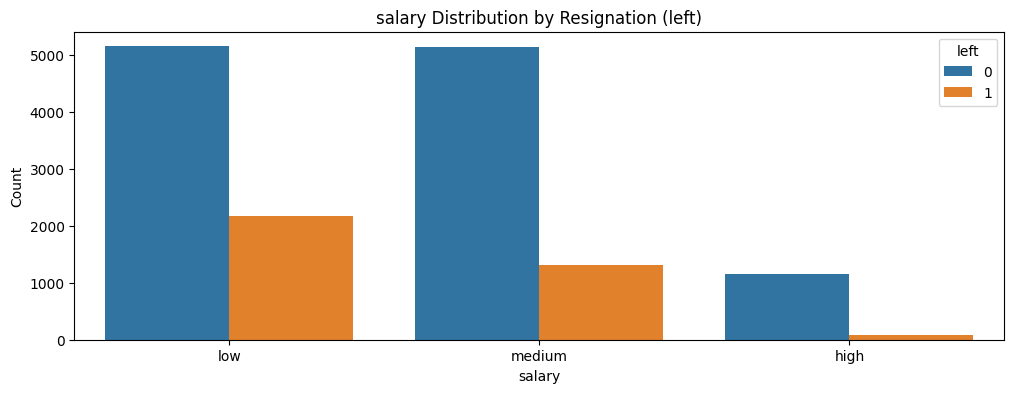

In [5]:
# Categorical features
categorical_columns = ['sales', 'salary']

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=data, x=column, hue="left")  # "left" indicates resignation
    plt.title(f"{column} Distribution by Resignation (left)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

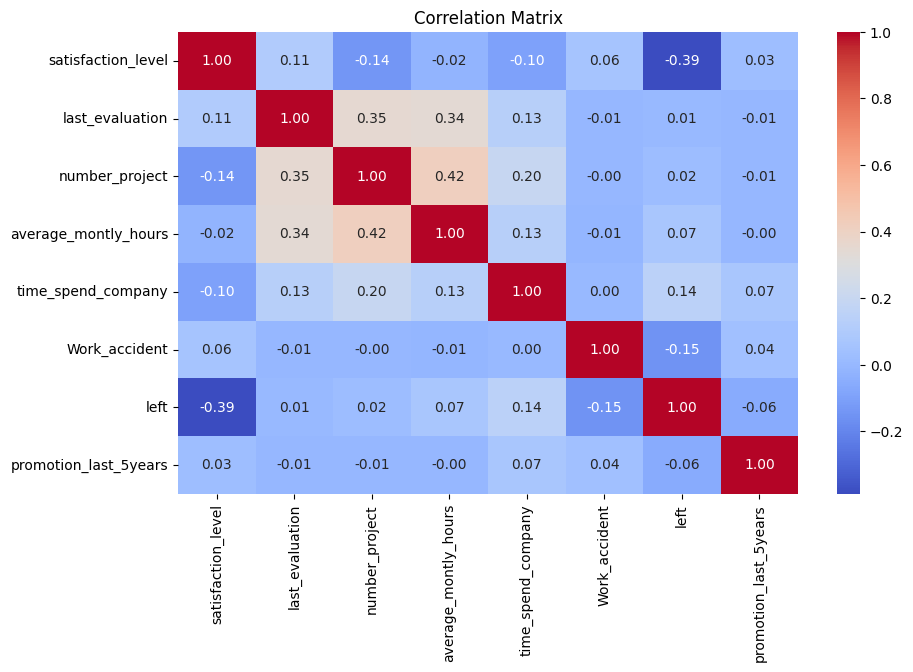

In [6]:
# Correlation heatmap for numerical features
ndata = data[data.columns[:-2]]
# print(ndata.head())

plt.figure(figsize=(10, 6))
correlation_matrix = ndata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


1.4: Check for Data Quality Issues


Number of duplicate rows: 3008


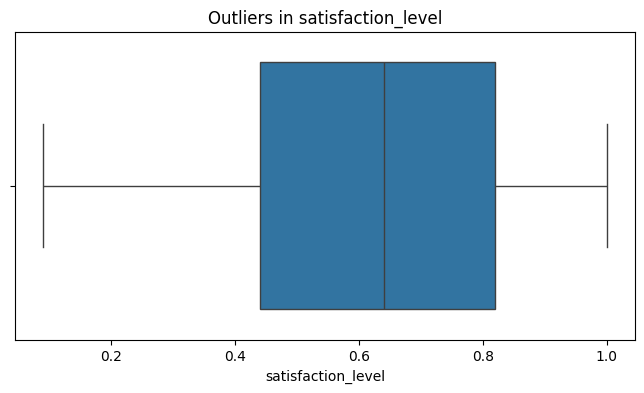

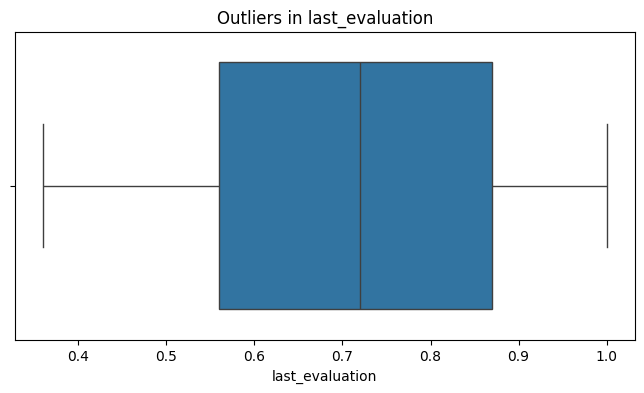

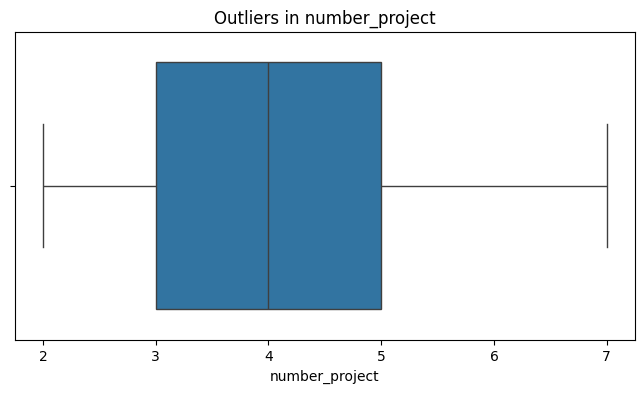

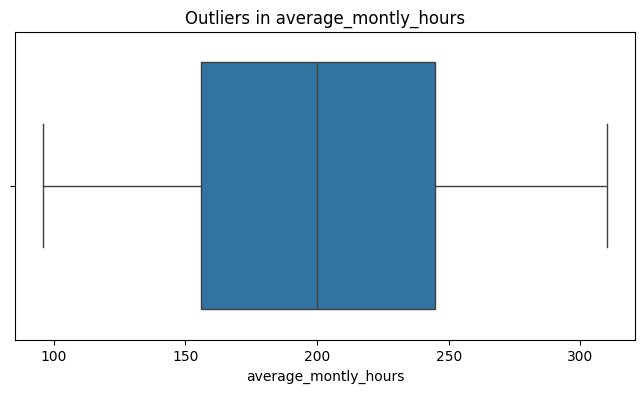

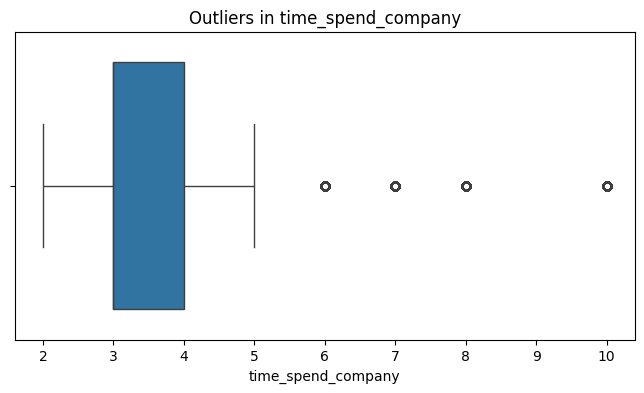

In [7]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Outliers detection (boxplot)
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Outliers in {column}")
    plt.xlabel(column)
    plt.show()


In [8]:
# Check for inconsistencies in categorical columns
print("\nChecking for inconsistent values in categorical columns:")
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())


Checking for inconsistent values in categorical columns:
Unique values in 'sales':
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique values in 'salary':
['low' 'medium' 'high']


1.5: Target Variable Analysis

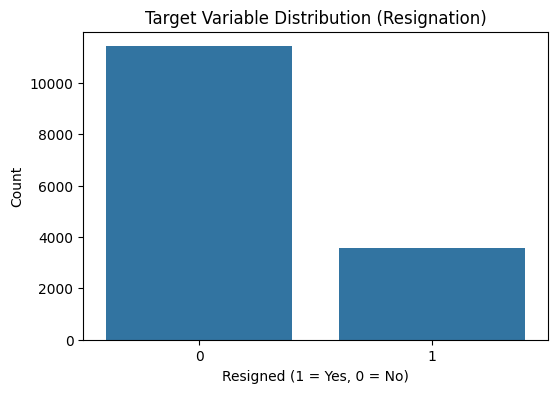

In [9]:
# Check the balance of the target variable (left)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="left")
plt.title("Target Variable Distribution (Resignation)")
plt.xlabel("Resigned (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Step 2: Data Wrangling

2.1 Handle Missing Values

In [10]:
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
# plt.title("Missing Values Heatmap")
# plt.show()

#There is no missing value


Missing Values per Column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


2.2 Feature Engineering and Encoding

In [11]:
# Encoding categorical variables

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[categorical_columns])

encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_data = pd.DataFrame(encoded_array, columns=encoded_columns)
encoded_data.index = data.index

# Drop original categorical columns and concatenate with encoded columns
data_encoded = data.drop(columns=categorical_columns).reset_index(drop=True)
data_final = pd.concat([data_encoded, encoded_data], axis=1)

print("\nData After Encoding:")
print(data_final.head())


Data After Encoding:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales_IT  \
0                   3              0     1                      0       0.0   
1                   6              0     1                      0       0.0   
2                   4              0     1                      0       0.0   
3                   5              0     1                      0       0.0   
4                   3              0     1                      0       0.0   

   sales_RandD  ...  s

2.3 Data Splitting

In [12]:
# Features (X) and Target (y)
X = data_final.drop('left', axis=1)
y = data_final['left']

# Step 1: Split into Training (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (10499, 20) (10499,)
Validation set: (2250, 20) (2250,)
Test set: (2250, 20) (2250,)


2.4 Scaling Numerical Features

In [13]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

print("\nScaled Numerical Features in Training Data:")
print(X_train[numerical_columns].head())


Scaled Numerical Features in Training Data:
       satisfaction_level  last_evaluation  number_project  \
9047             0.634516         0.426710       -0.646955   
12494            0.916311         1.652195        0.974719   
12427           -0.251124        -0.682063       -0.646955   
13785           -0.492662        -1.148915        0.163882   
13190            1.439644        -0.506994        0.974719   

       average_montly_hours  time_spend_company  
9047               1.448411           -1.032532  
12494              0.346103            1.023978  
12427             -0.415493            0.338475  
13785             -0.796290            2.394985  
13190              1.147781           -1.032532  


2.5 Address Class Imbalance

In [14]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass Distribution After SMOTE:")
print(y_train_resampled.value_counts())


Class Distribution After SMOTE:
left
0    7999
1    7999
Name: count, dtype: int64


2.6 Outlier Detection and Handling

Outlier handling complete.


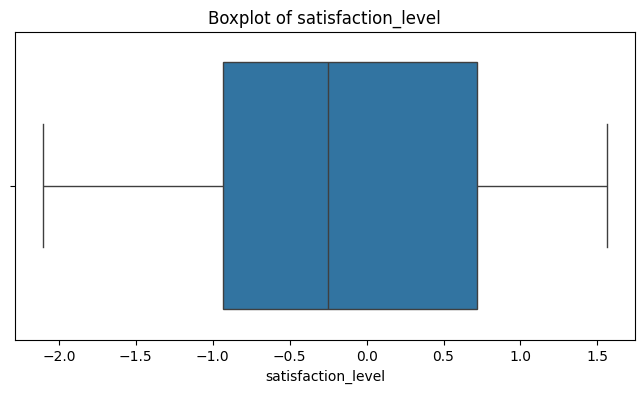

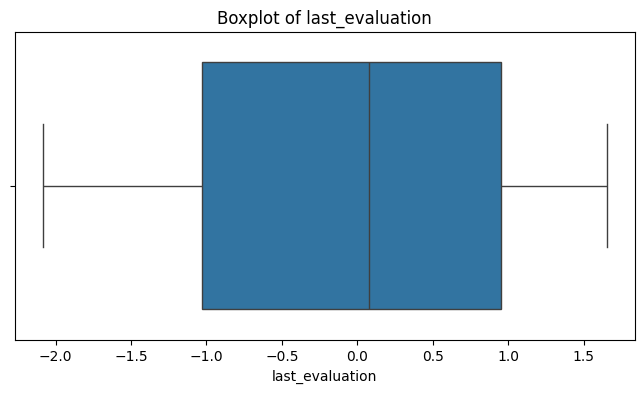

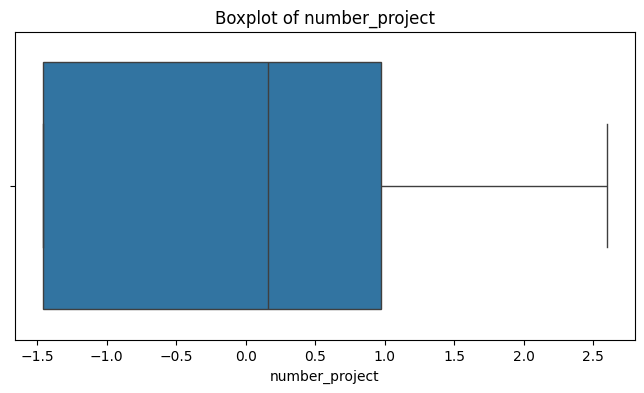

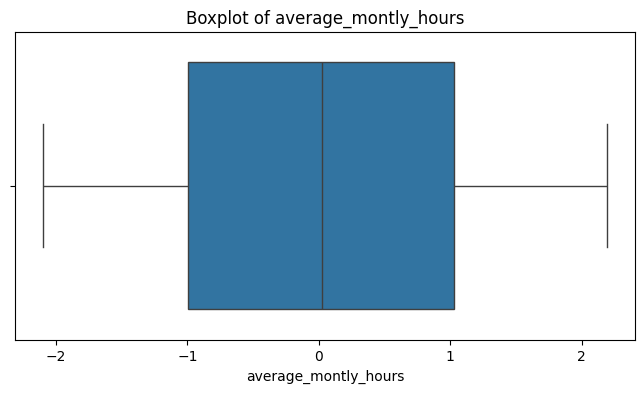

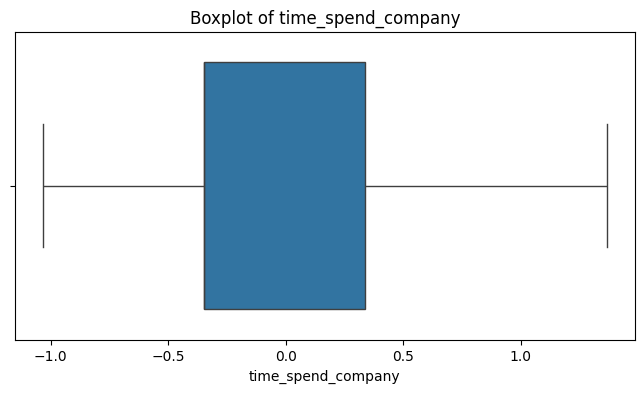

In [15]:
for col in numerical_columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap/Floor outliers in the training set
    X_train_resampled[col] = X_train_resampled[col].clip(lower=lower_bound, upper=upper_bound)


print("Outlier handling complete.")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X_train_resampled[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 3: Model Engineering

3.1 Baseline Model

Training Logistic Regression...

Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1714
           1       0.54      0.83      0.65       536

    accuracy                           0.79      2250
   macro avg       0.74      0.81      0.75      2250
weighted avg       0.84      0.79      0.80      2250

AUC-ROC: 0.8370


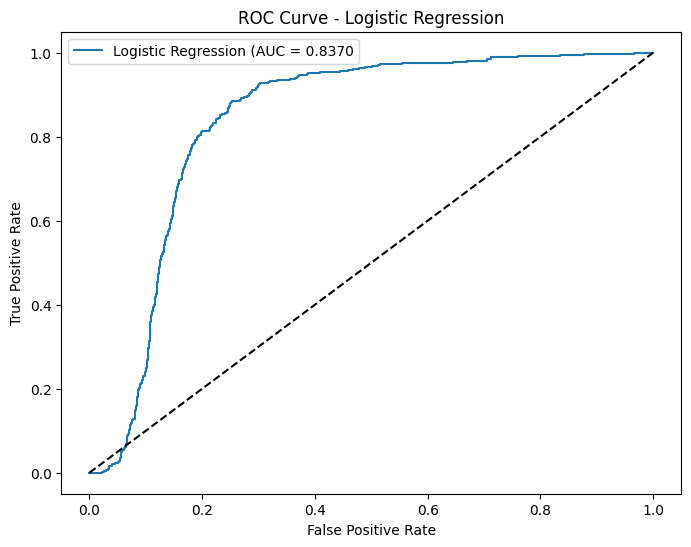

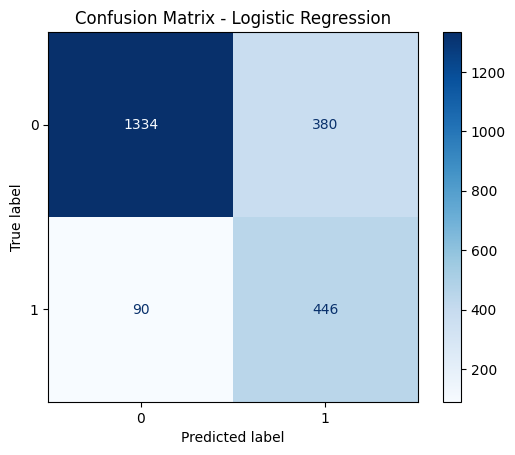

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train models
print("Training Logistic Regression...")
log_reg.fit(X_train_resampled, y_train_resampled)

# Evaluate models on validation data
def evaluate_model(model, X_val, y_val, model_name):
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    auc = roc_auc_score(y_val, y_prob)
    print(f"AUC-ROC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Evaluate each model
evaluate_model(log_reg, X_val, y_val, "Logistic Regression")


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions on the validation set
y_pred_baseline = log_reg.predict(X_val)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_val, y_pred_baseline)
baseline_precision = precision_score(y_val, y_pred_baseline)
baseline_recall = recall_score(y_val, y_pred_baseline)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Recall: {baseline_recall:.4f}")


Baseline Accuracy: 0.7911
Baseline Precision: 0.5400
Baseline Recall: 0.8321


3.2 Model Selection

Training Random Forest...
Training XGBoost...

Evaluating Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.97      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.99      2250
weighted avg       0.99      0.99      0.99      2250

AUC-ROC: 0.9928


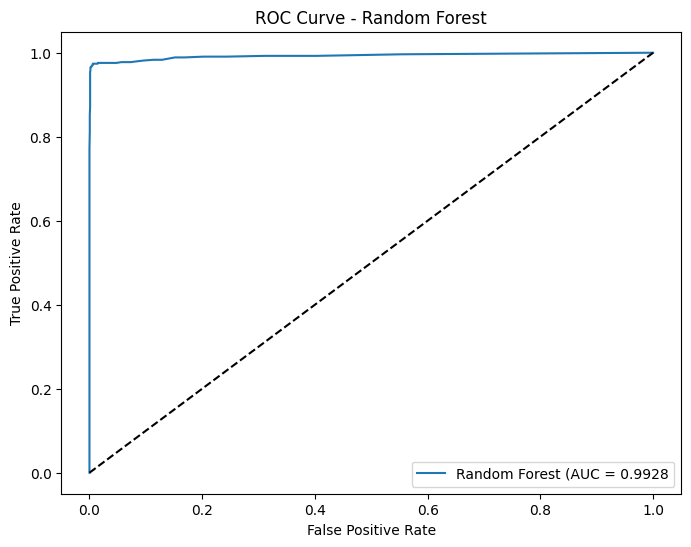

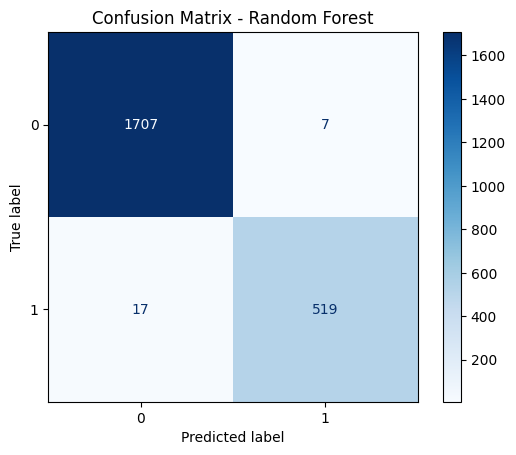


Evaluating XGBoost...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1714
           1       0.97      0.96      0.97       536

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250

AUC-ROC: 0.9946


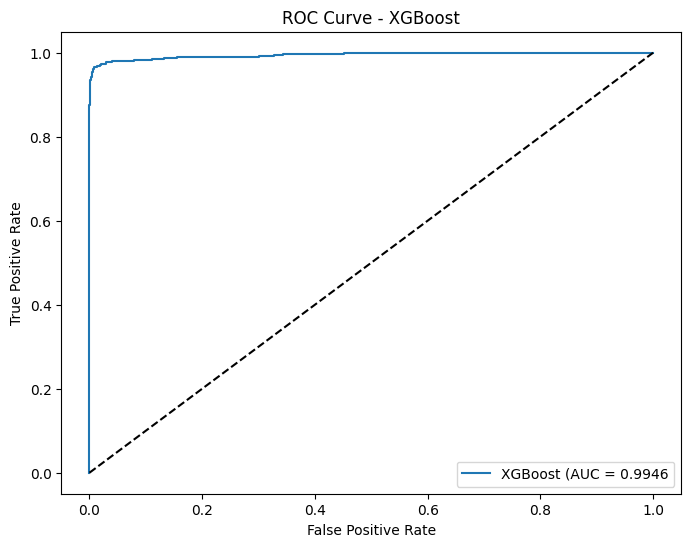

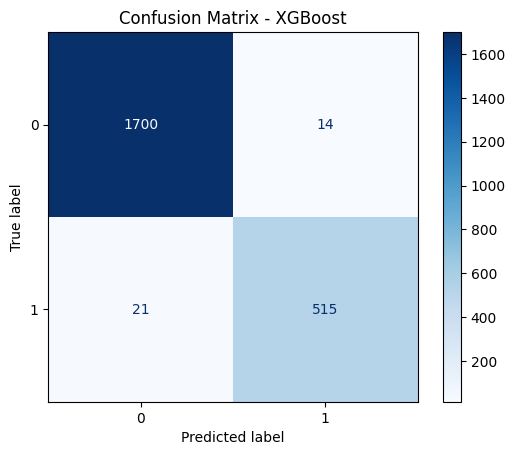


Training complete.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

print("Training Random Forest...")
rf_clf.fit(X_train_resampled, y_train_resampled)
print("Training XGBoost...")
xgb_clf.fit(X_train_resampled, y_train_resampled)


def evaluate_model(model, X_val, y_val, model_name):
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    auc = roc_auc_score(y_val, y_prob)
    print(f"AUC-ROC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Evaluate each model
evaluate_model(rf_clf, X_val, y_val, "Random Forest")
evaluate_model(xgb_clf, X_val, y_val, "XGBoost")

# Compare Models (Optional - Extend with a DataFrame for ranking if needed)
print("\nTraining complete.")

In [19]:
y_pred_rf = rf_clf.predict(X_val)
y_pred_xgb = xgb_clf.predict(X_val)


baseline_accuracy = accuracy_score(y_val, y_pred_rf)
baseline_precision = precision_score(y_val, y_pred_rf)
baseline_recall = recall_score(y_val, y_pred_rf)

print("FOR RANDOM FOREST")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Recall: {baseline_recall:.4f}")


baseline_accuracy = accuracy_score(y_val, y_pred_xgb)
baseline_precision = precision_score(y_val, y_pred_xgb)
baseline_recall = recall_score(y_val, y_pred_xgb)

print("\nFOR XGBoost")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Recall: {baseline_recall:.4f}")

FOR RANDOM FOREST
Baseline Accuracy: 0.9893
Baseline Precision: 0.9867
Baseline Recall: 0.9683

FOR XGBoost
Baseline Accuracy: 0.9844
Baseline Precision: 0.9735
Baseline Recall: 0.9608


3.3 Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # n_jobs=-1 uses all CPU cores

# Fit to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and best parameters
best_rf_model_grid = grid_search.best_estimator_
best_params_grid = grid_search.best_params_

print(f"Best Parameters (Grid Search): {best_params_grid}")


Best Parameters (Grid Search): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [21]:
best_rf_model_grid

RandomForestClassifier(n_estimators=200, random_state=42)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_clf, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and best parameters
best_rf_model_random = random_search.best_estimator_
best_params_random = random_search.best_params_

print(f"Best Parameters (Randomized Search): {best_params_random}")
print(best_rf_model_random)


Best Parameters (Randomized Search): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 170}
RandomForestClassifier(min_samples_split=5, n_estimators=170, random_state=42)


In [24]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30, step=10) # step=10: values will be 10, 20, 30
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 random_state=42)
    
    score = cross_val_score(rf_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=10)  # Number of trials to run

# Get the best parameters
best_params_optuna = study.best_params

print(f"Best Parameters (Bayesian Optimization - Optuna): {best_params_optuna}")

# Create the best model using the best parameters from Optuna
best_rf_model_optuna = RandomForestClassifier(**best_params_optuna, random_state=42)
best_rf_model_optuna.fit(X_train_resampled, y_train_resampled)

c:\Users\fatij\Desktop\Application\enviroment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-01-24 01:36:28,342] A new study created in memory with name: no-name-fa9c958d-5c40-4edf-8988-c51f291b19b2
[I 2025-01-24 01:36:35,383] Trial 0 finished with value: 0.972622049859331 and parameters: {'n_estimators': 84, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.972622049859331.
[I 2025-01-24 01:36:39,862] Trial 1 finished with value: 0.9679963660518911 and parameters: {'n_estimators': 69, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.972622049859331.
[I 2025-01-24 01:36:48,293] Trial 2 finished with value: 0.9853736909971866 and parameters: {'n_estimators': 106, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_

Best Parameters (Bayesian Optimization - Optuna): {'n_estimators': 106, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 1}


RandomForestClassifier(max_depth=20, min_samples_split=7, n_estimators=106,
                       random_state=42)

In [ ]:
pip install optuna

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define each parameter set
params_optuna = {'n_estimators': 132, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1}
params_random = {'n_estimators': 54, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}
params_grid = {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Initialize models with the different parameter sets
models = {
    "Optuna": RandomForestClassifier(**params_optuna, random_state=42),
    "Randomized Search": RandomForestClassifier(**params_random, random_state=42),
    "Grid Search": RandomForestClassifier(**params_grid, random_state=42),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }

# Display the results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                   Accuracy  Precision    Recall  F1 Score
Optuna             0.985778   0.988350  0.951402  0.969524
Randomized Search  0.983556   0.982558  0.947664  0.964795
Grid Search        0.986667   0.986513  0.957009  0.971537


3.4 Model Evaluation

Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1715
           1       0.99      0.96      0.97       535

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

ROC AUC Score: 0.9765


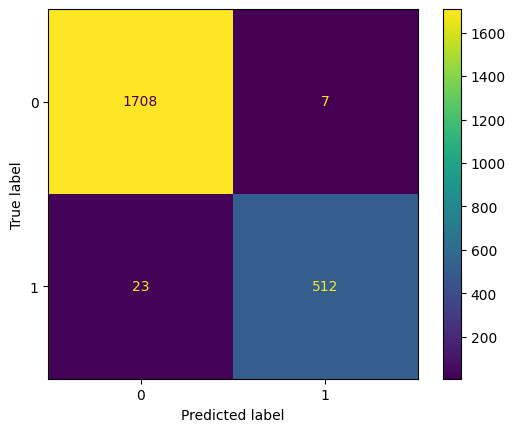

Cross-Validation Scores: [0.9809375  0.985      0.9925     0.99093467 0.99218506]
Average Cross-Validation Score: 0.9883


In [26]:
# Choose the best model based on validation performance (example: using Grid Search results)
best_rf_model = best_rf_model_grid 

# 3.4 Model Evaluation (Expanded)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Metrics
print("Model Evaluation Metrics:")
print(classification_report(y_test, y_pred_best))  # Includes accuracy, precision, recall, F1-score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_best):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Cross-Validation (on the training set)
cv_scores = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean():.4f}")



3.5 Feature Importance and Model Interpretability 

In [27]:
import pandas as pd

# Feature Importance for Random Forest
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)



Feature Importance:
                  Feature  Importance
0      satisfaction_level    0.261817
4      time_spend_company    0.223413
2          number_project    0.168786
3    average_montly_hours    0.147265
1         last_evaluation    0.125386
5           Work_accident    0.019757
18             salary_low    0.009088
17            salary_high    0.007387
16        sales_technical    0.006390
14            sales_sales    0.005887
19          salary_medium    0.004904
15          sales_support    0.004525
9        sales_accounting    0.002415
8             sales_RandD    0.002305
6   promotion_last_5years    0.002252
11       sales_management    0.002109
7                sales_IT    0.002035
10               sales_hr    0.001909
12        sales_marketing    0.001200
13      sales_product_mng    0.001170


In [ ]:
import shap

# Create an explainer object (using TreeExplainer for tree-based models)
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for a subset of the data (e.g., the test set)
shap_values = explainer.shap_values(X_test)

# Summary plot (shows global feature importance and impact on predictions)
shap.summary_plot(shap_values, X_test)

# Force plot (shows individual prediction explanations)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:]) # for a single prediction


In [ ]:
pip install shap

3.6 Export the Best Model

In [28]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'best_model.pkl')

# Save the scaler and encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("\nBest model and preprocessing objects saved to 'artifacts/' directory.")



Best model and preprocessing objects saved to 'artifacts/' directory.


In [ ]:
pip install joblib